In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\craig\\Documents\\Python Scripts\\Notebooks\\ultimate_challenge'

In [3]:
df = pd.read_json('logins.json')

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [28]:

df.describe()

,login_count
count,93142.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   login_count  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [5]:
# add a column
df['login_count'] = 1
# convert the date and set as index
df = df.set_index(pd.to_datetime(df['login_time'], unit='s'))[['login_count']]
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [6]:

# resample index in 15 minute chunks
logins_resample15 = df.resample('15Min').sum()

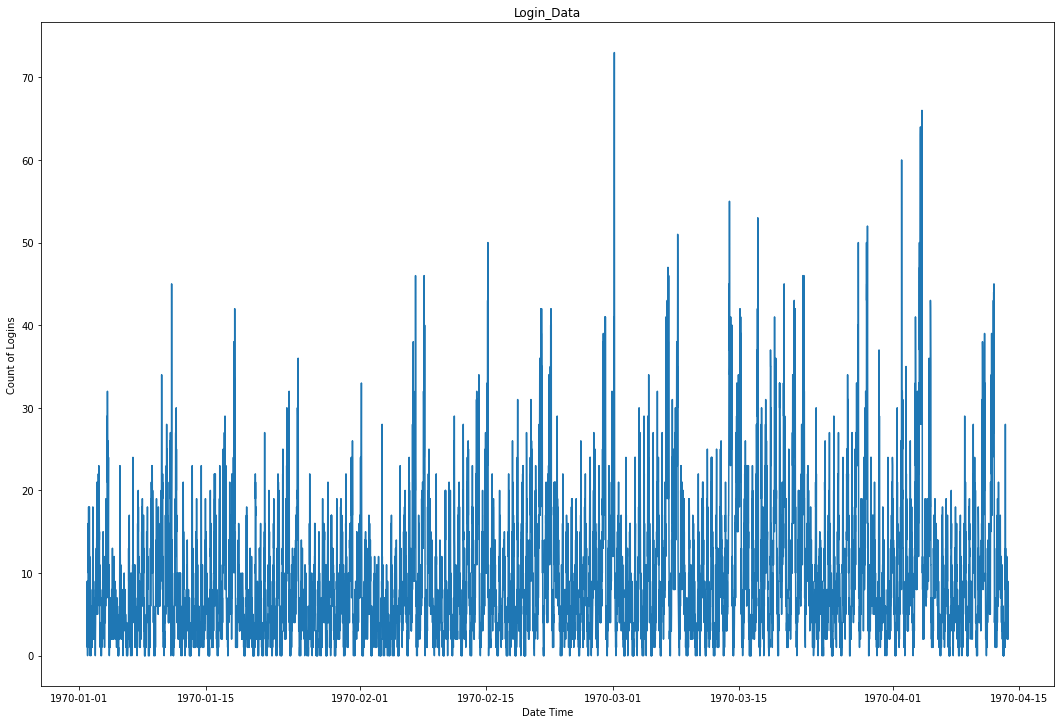

In [10]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xlabel('Date Time')
plt.ylabel('Count of Logins')
plt.tight_layout()
plt.title('Login_Data')
plt.plot(logins_resample15.index, logins_resample15.login_count)

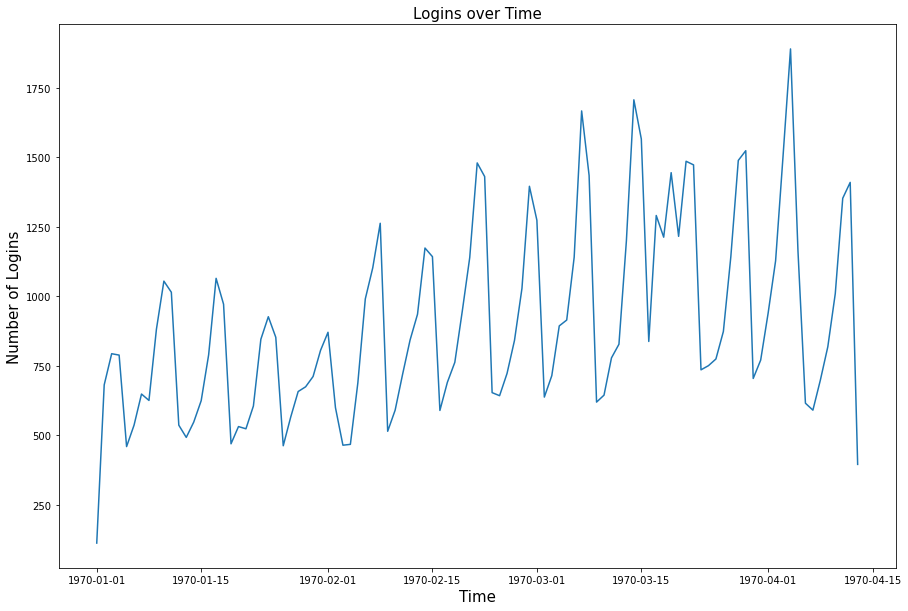

In [13]:
# The previous scatterplot was too granular to determine a patterns.  Let's try resampleing by day. 
logins_daily = df.resample('D').sum()

fig, ax = plt.subplots(figsize = (15,10))
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Number of Logins', fontsize = 15)
plt.title('Logins over Time', fontsize = 15)
plt.plot(logins_daily.index, logins_daily.login_count, label = 'Daily Frequencies')
#plt.scatter(logins_biz_day.index, logins_biz_day.login_count, label='Weekdays')



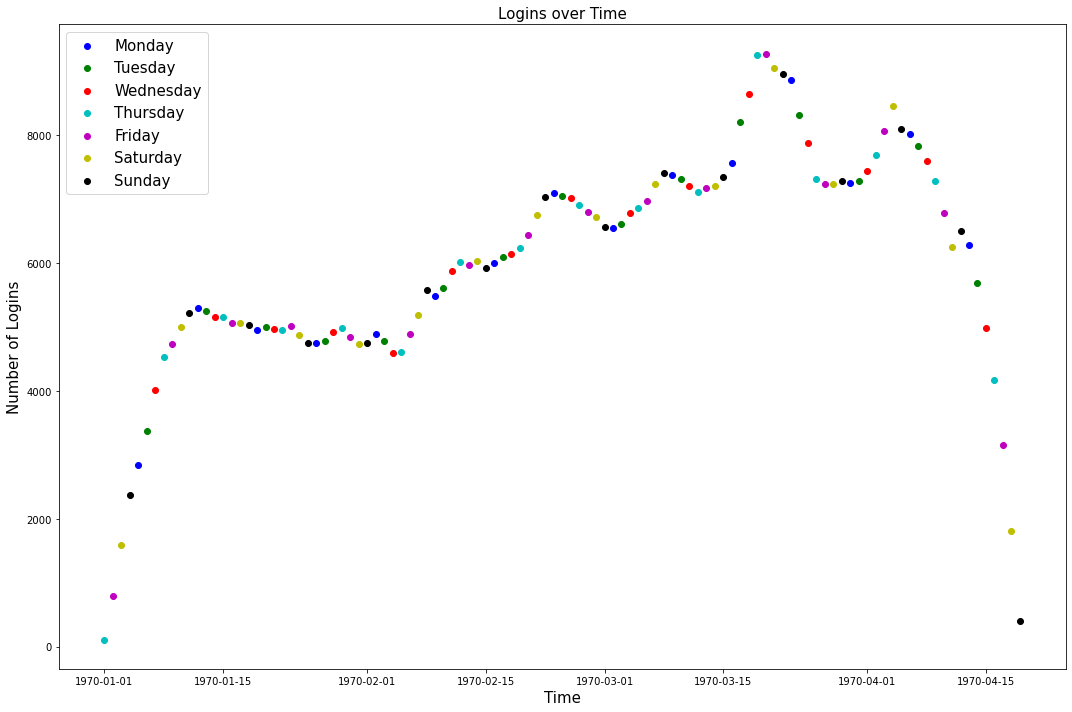

In [21]:
#Looks like there is a cyclical nature to the day.  Is it weekly?  Need more granularity.  

# bin data by the day
#logins_daily = df.resample('D').sum()
mon = df.resample('W-MON').sum()
tue = df.resample('W-TUE').sum()
wed = df.resample('W-WED').sum()
thu = df.resample('W-THU').sum()
fri = df.resample('W-FRI').sum()
sat = df.resample('W-SAT').sum()
sun = df.resample('W-SUN').sum()

fig, ax = plt.subplots(figsize = (15,10))
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Number of Logins', fontsize =15)
plt.title('Logins over Time', fontsize =15)

plt.scatter(mon.index, mon.login_count, label = "Monday",  color = 'b')
plt.scatter(tue.index, tue.login_count,  label = "Tuesday", color = 'g')
plt.scatter(wed.index, wed.login_count, label = 'Wednesday', color = 'r')
plt.scatter(thu.index, thu.login_count, label = "Thursday", color = 'c')
plt.scatter(fri.index, fri.login_count,  label = "Friday", color = 'm')
plt.scatter(sat.index, sat.login_count, label = 'Saturday', color = 'y')
plt.scatter(sun.index, sun.login_count, label = "Sunday", color = 'k')


plt.legend(loc='upper left', fontsize = 15)
plt.tight_layout()

In [ ]:

#It seems that maybe the weekends have more logins but it is hard to tell with the above visualization.  
#Need Hourly granulatiry. 




In [15]:
df_hourly = df.resample('H').sum()
#creating a day of week column
day_of_week = list(df_hourly.index.dayofweek)
df_hourly['day'] = day_of_week
#creating a column for the hour
df_hourly['hour'] = [time.hour for time in df_hourly.index]
df_hourly.head()

,login_count,day,hour
login_time,,,
1970-01-01 20:00:00,24,3,20
1970-01-01 21:00:00,9,3,21
1970-01-01 22:00:00,21,3,22
1970-01-01 23:00:00,58,3,23
1970-01-02 00:00:00,53,4,0


In [ ]:
#The above looks correct.  Should be able to show the hourly changes for each day of week.  


In [23]:
#data frame of the average hourly logins by day of week
avg_hourly_logins = pd.pivot_table(df_hourly, values = 'login_count', index = 'hour', columns = 'day', aggfunc=np.mean).rename(columns= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
avg_hourly_logins = avg_hourly_logins.stack(level=['day'])
avg_hourly_logins.name = 'avg_num_logins'
avg_hourly_logins_df = avg_hourly_logins.reset_index()

avg_hourly_logins_df.head()

,hour,day,avg_num_logins
0,0,Monday,35.400000
1,0,Tuesday,43.357143
2,0,Wednesday,49.071429
3,0,Thursday,58.285714
4,0,Friday,65.000000


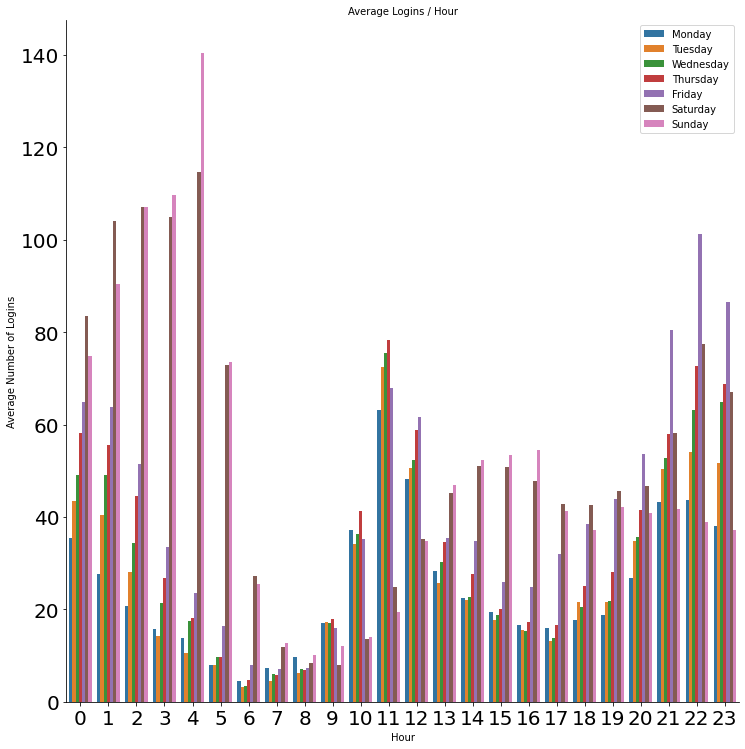

In [27]:
sns.catplot(x='hour', y='avg_num_logins', data=avg_hourly_logins_df, kind = 'bar', 
            hue='day',height=10,  legend=False)
ax = plt.gca()
ax.set_title('Average Logins / Hour', fontsize = 10)
ax.set_xlabel('Hour', fontsize = 10)
ax.set_ylabel('Average Number of Logins', fontsize = 10)
ax.tick_params(labelsize=20,labelcolor="black")
ax.legend(loc='upper right', fontsize = 10)


In [ ]:
#The highest period of use is 9PM to 5 AM on Saturday and Sunday. 
#Monday to Friday the highest period of use in 10 AM to 1 PM and 8 PM to 1 AM.  

Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Assumption - There is a record of each bridge crossing. 

1.  The metric I would choose is the change of crossings on the weekday.  Drivers will need to move from Gotham to Metropolis as the day moves on and back.  As there is reasonable activity in both cities on the weekend a crossing is not as easily measurable required.  

2.  
Null Hypotheisis - There is no difference in the number of crossings if there is a toll or not.
Alternate Hypothesis - This is a difference in the number of crossings

Collect data for at least 30 week days under both circumstances and use a two tail z test to determine significance.  It might be necessary to collect data based on the time of day.  Maybe Gotham is more likely to go to Metropolis but not the other way around.  

If the p-value is less than .05 then I would reject the null hypothesis and claim that the experiment had an effect on partner driver behavior. 






Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).
Data description
● city: city this user signed up in
● phone: primary device for this user
● signup_date: date of account registration; in the form ‘YYYY MM DD’
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
● avg_rating_by_driver: the rider’s average rating over all of their trips
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
● surge_pct: the percent of trips taken with surge multiplier > 1
● avg_surge: The average surge multiplier over all of this user’s trips
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [80]:
retention_df = pd.read_json('ultimate_data_challenge.json')

In [81]:
retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [82]:
retention_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [83]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [84]:
#df[df['column name'].isna()]
retention_df[retention_df['avg_rating_of_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [85]:
#Updating null values with zero

retention_df['avg_rating_of_driver'] =retention_df['avg_rating_of_driver'].fillna(0)

In [86]:
retention_df[retention_df['avg_rating_by_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.00,2014-02-09,iPhone,0.0,False,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.00,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,0.0,1.00,2014-01-26,iPhone,0.0,False,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.00,2014-02-08,Android,0.0,False,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.00,2014-03-16,iPhone,0.0,False,0.0,0.42,NaN
1021,King's Landing,0,2014-01-23,0.0,1.75,2014-06-13,iPhone,100.0,True,100.0,2.33,NaN
1073,King's Landing,0,2014-01-19,5.0,1.00,2014-04-27,Android,0.0,False,0.0,9.21,NaN
1164,Winterfell,1,2014-01-24,2.0,1.00,2014-01-25,Android,0.0,True,100.0,2.57,NaN
1181,Winterfell,1,2014-01-25,3.0,1.00,2014-01-25,Android,0.0,False,0.0,24.91,NaN
1205,Winterfell,0,2014-01-18,0.0,1.00,2014-02-22,Android,0.0,False,100.0,8.94,NaN


In [87]:
retention_df['avg_rating_by_driver'] =retention_df['avg_rating_by_driver'].fillna(0)

In [88]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [89]:
retention_df['phone'] =retention_df['phone'].fillna('Unknown')

In [90]:
retention_df['signup_date'] = pd.to_datetime(retention_df['signup_date'])
retention_df['last_trip_date'] = pd.to_datetime(retention_df['last_trip_date'])

In [91]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [92]:
extract_date = retention_df.last_trip_date.max()
print(extract_date)

2014-07-01 00:00:00


In [93]:
cut_off_day = extract_date - pd.Timedelta('30 days')
print(cut_off_day)

2014-06-01 00:00:00


In [94]:
#creating active field
retention_df['active'] = (retention_df.last_trip_date > cut_off_day).astype('int')
retention_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [95]:
retention_df['active'].value_counts()

#print(percent)

0    31690
1    18310
Name: active, dtype: int64

In [96]:
print(18310/50000)
#36.62 percent of customers were retained

0.3662


In [97]:
retention_df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
trips_in_first_30_days,1.000000,0.182136,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.016127,0.214728
avg_rating_of_driver,0.182136,1.000000,-0.013315,0.005272,0.034175,0.025105,-0.116150,0.037230,0.146989
avg_surge,-0.001841,-0.013315,1.000000,0.793582,-0.078791,-0.110071,-0.081491,-0.005918,-0.003567
surge_pct,0.005720,0.005272,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.004184,0.010612
ultimate_black_user,0.112210,0.034175,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.023020,0.210259
weekday_pct,0.050388,0.025105,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.024253,0.026413
avg_dist,-0.136329,-0.116150,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.063722,-0.090279
avg_rating_by_driver,-0.016127,0.037230,-0.005918,0.004184,0.023020,0.024253,0.063722,1.000000,-0.006596
active,0.214728,0.146989,-0.003567,0.010612,0.210259,0.026413,-0.090279,-0.006596,1.000000


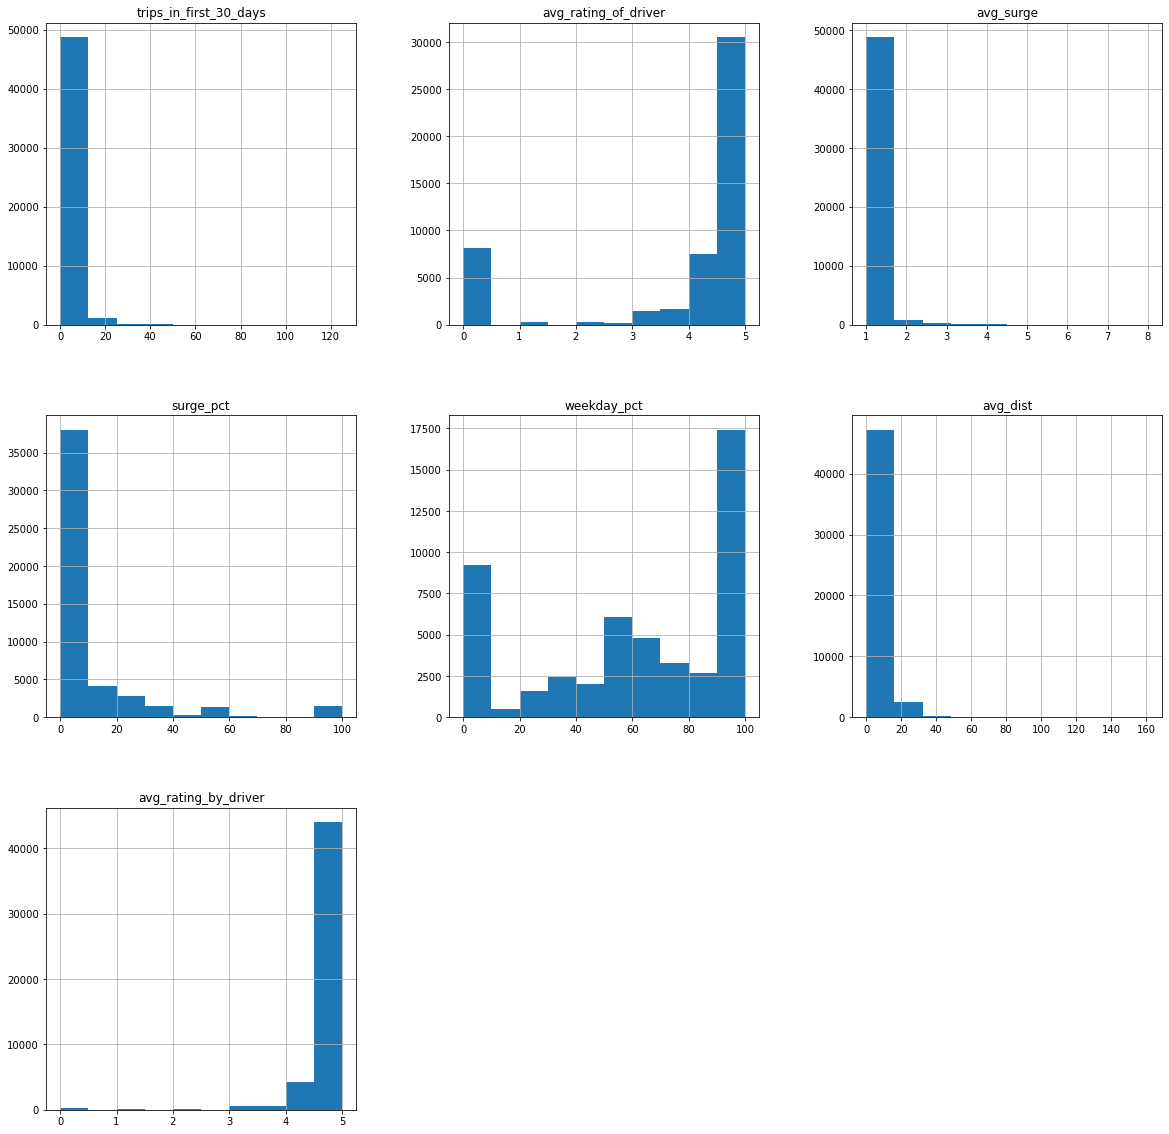

In [98]:
list = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct',  'weekday_pct', 'avg_dist', 'avg_rating_by_driver']
hist = retention_df[list].hist(bins=10,figsize =(20,20))

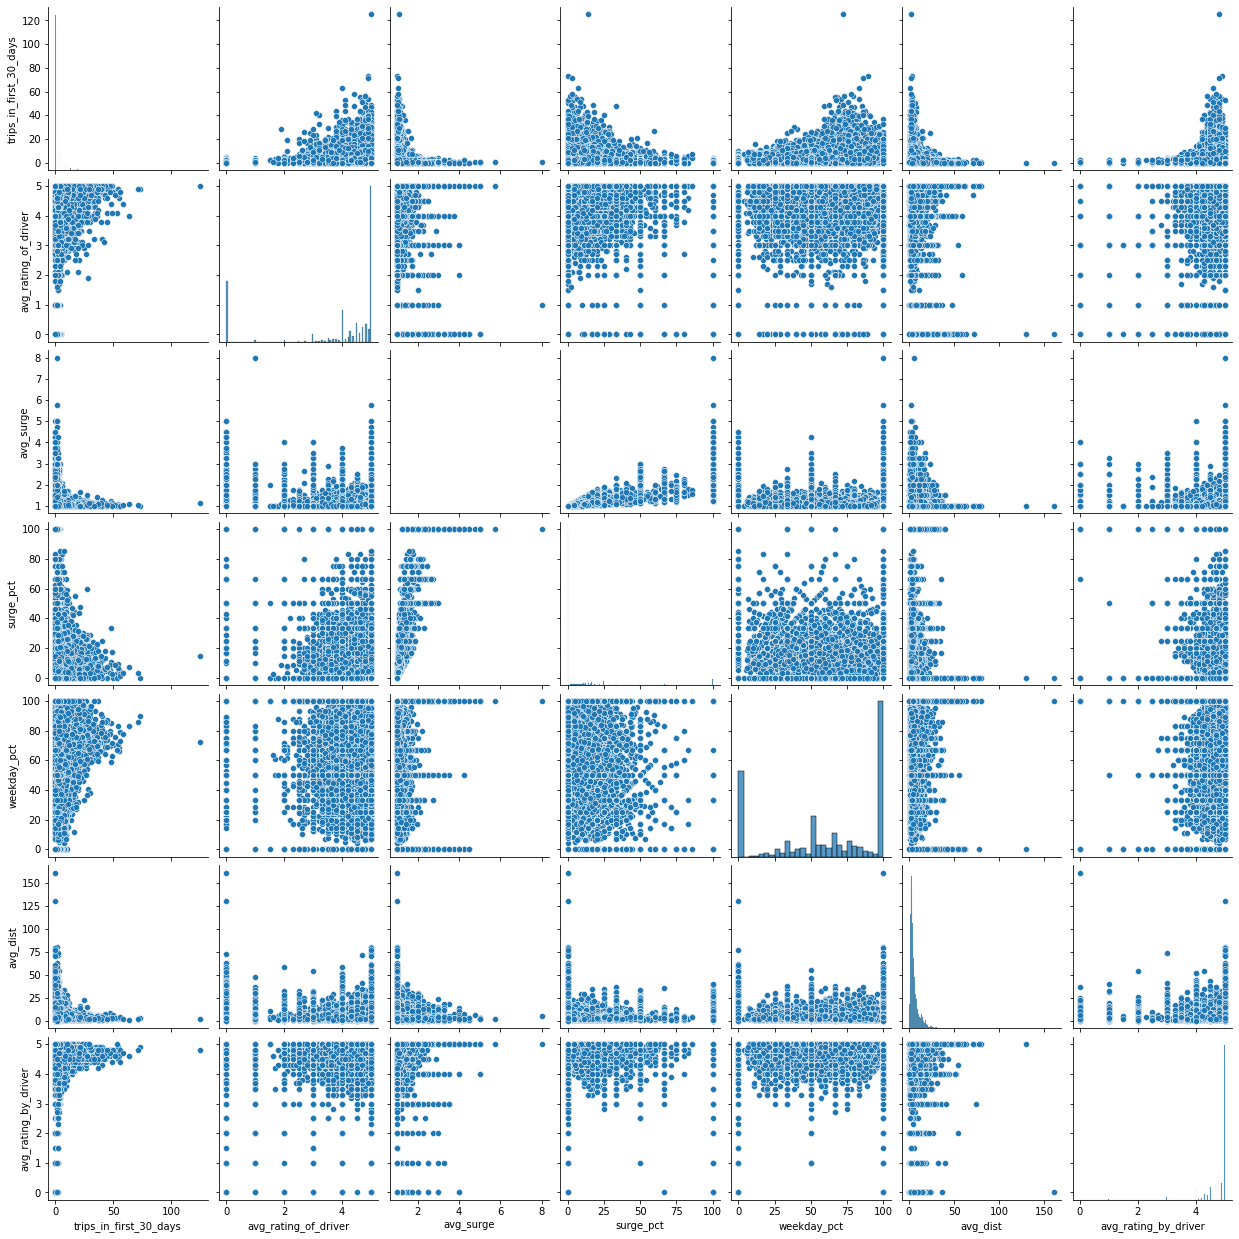

In [99]:
sns.pairplot(retention_df[list])

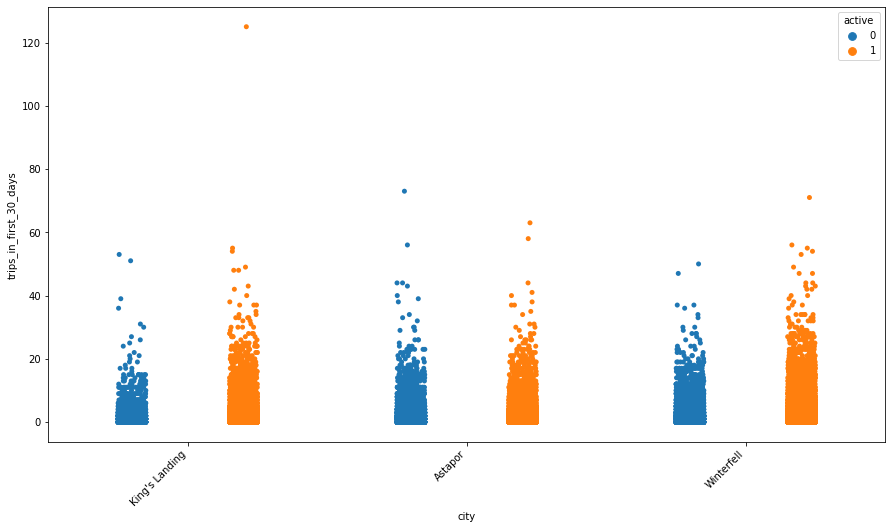

In [100]:
plt.figure(figsize=(15,8))
pricebox = sns.stripplot(x="city", y="trips_in_first_30_days", hue='active', data=retention_df, jitter=True, dodge=True)
pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

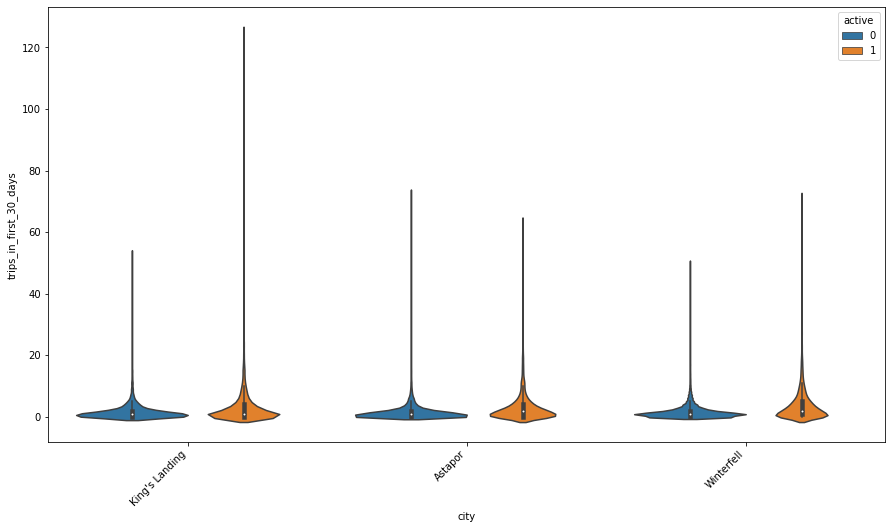

In [101]:
plt.figure(figsize=(15,8))
pricebox = sns.violinplot(x="city", y="trips_in_first_30_days", hue='active', data=retention_df)

pricebox.set_xticklabels(pricebox.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [102]:
#retention_df = pd.get_dummies(retention_df, columns = ['city', 'phone'])

In [103]:
from pycaret.classification import *

In [114]:
df = retention_df.drop(columns=['last_trip_date'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [115]:
exp_reg = setup(data = df, target = 'active', session_id=100)

Setup Succesfully Completed!


,Description,Value
0,session_id,100
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(50000, 12)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [116]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7968,0.8621,0.6712,0.7484,0.7076,0.5527,0.5547,13.6887
1,Light Gradient Boosting Machine,0.7943,0.8615,0.6702,0.7433,0.7048,0.5477,0.5494,0.3891
2,Extreme Gradient Boosting,0.7907,0.8546,0.6613,0.7398,0.6983,0.5388,0.5408,1.0788
3,Gradient Boosting Classifier,0.7895,0.8548,0.6595,0.7380,0.6965,0.5361,0.5382,3.1813
4,Ada Boost Classifier,0.7844,0.8474,0.6442,0.7347,0.6864,0.5232,0.5259,1.0308
5,Random Forest Classifier,0.7549,0.8068,0.5851,0.6971,0.6361,0.4534,0.4575,0.2480
6,Extra Trees Classifier,0.7511,0.8051,0.6402,0.6671,0.6533,0.4593,0.4596,1.5830
7,K Neighbors Classifier,0.7434,0.7823,0.5944,0.6684,0.6292,0.4340,0.4358,0.4835
8,Logistic Regression,0.7305,0.7722,0.4964,0.6811,0.5742,0.3841,0.3944,0.3346
9,Linear Discriminant Analysis,0.7282,0.7713,0.4827,0.6821,0.5653,0.3759,0.3878,0.1483


In [117]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8082,0.8768,0.6878,0.7646,0.7242,0.5778,0.5797
1,0.7882,0.8561,0.6712,0.7288,0.6988,0.5359,0.5370
2,0.8018,0.8610,0.6800,0.7543,0.7152,0.5639,0.5656
3,0.8039,0.8648,0.6693,0.7656,0.7142,0.5660,0.5690
4,0.7900,0.8605,0.6663,0.7352,0.6991,0.5384,0.5399
5,0.7879,0.8483,0.6722,0.7276,0.6988,0.5355,0.5365
6,0.7936,0.8614,0.6559,0.7494,0.6996,0.5434,0.5462
7,0.7950,0.8584,0.6667,0.7467,0.7044,0.5483,0.5503
8,0.8050,0.8684,0.6686,0.7691,0.7153,0.5681,0.5714
9,0.7949,0.8653,0.6741,0.7422,0.7065,0.5495,0.5510


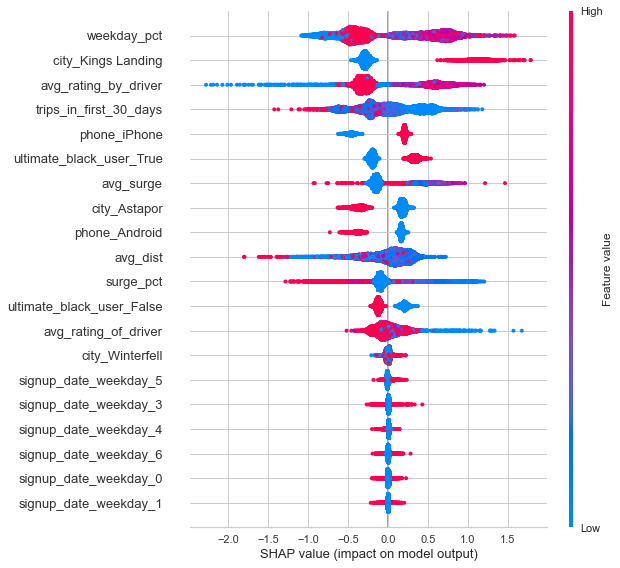

In [118]:
interpret_model(catboost)

In [ ]:
#the best models were tree based models with catboost being the best.  the most important features were the percentage of rides in the weekday and if the city was kings landing.  